In [23]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (6, 4.5)

# Edge Detection

## Edge Detection in 1D

Here is an array representing an edge in 1D.

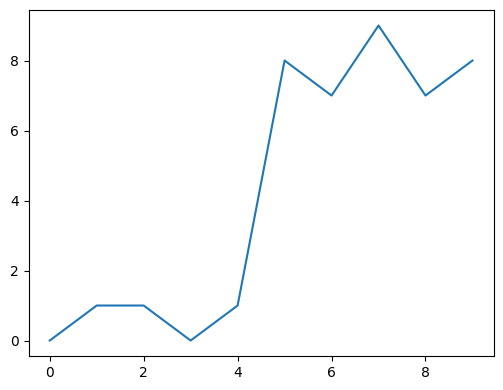

In [24]:
edge = np.array([0., 1., 1., 0., 1., 8., 7., 9., 7., 8.])
plt.plot(edge)
plt.show()

(1 point) Calculate the derivative of this array. In order words, for each position, calculate the difference between the next element and the current element. You should be able to do this in one line in vectorized form without using `for` loops.

Don't worry too much about boundaries. We'll just have the resulting array one element shorter than the input.

Plot the result together with the original array. You should able to see that the peak of your derivative array indictes where the step edge is.

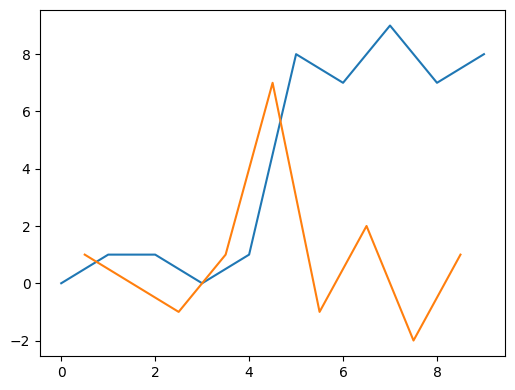

In [25]:
derivative = np.array([edge[i+1] - edge[i] for i in range(len(edge)-1)])
plt.plot(edge)
plt.plot(np.arange(len(derivative)) + 0.5, derivative)
plt.show()

(1 point) Verify that this is equivalent to convolving the input array with a 2-element kernel. Define this kernel in the cell below, do the convolution by calling `np.convolve()`, and plot the result. To ensure that the output has the same shape as in the last cell, you should choose the correct `mode` parameter when calling `np.convolve()`.

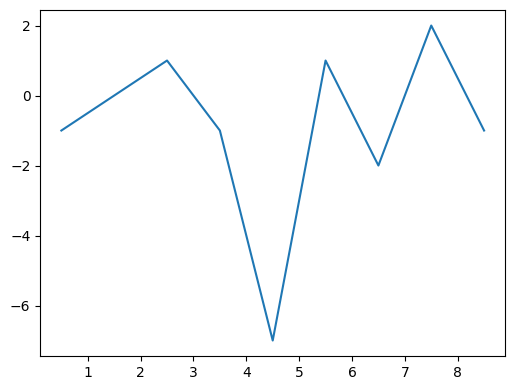

In [26]:
kernel = [-1, 1]
new_derivative = np.convolve(edge, kernel, 'valid')
plt.plot(np.arange(len(new_derivative)) + 0.5, new_derivative)
plt.show()

## Edge Detection in 2D

The following cell loads a sample image, converts it to grayscale, and displays it.

We set `cmap='gray'` when displaying the grayscale image. To make things easier for the graders, you should do the same in your code snippets.

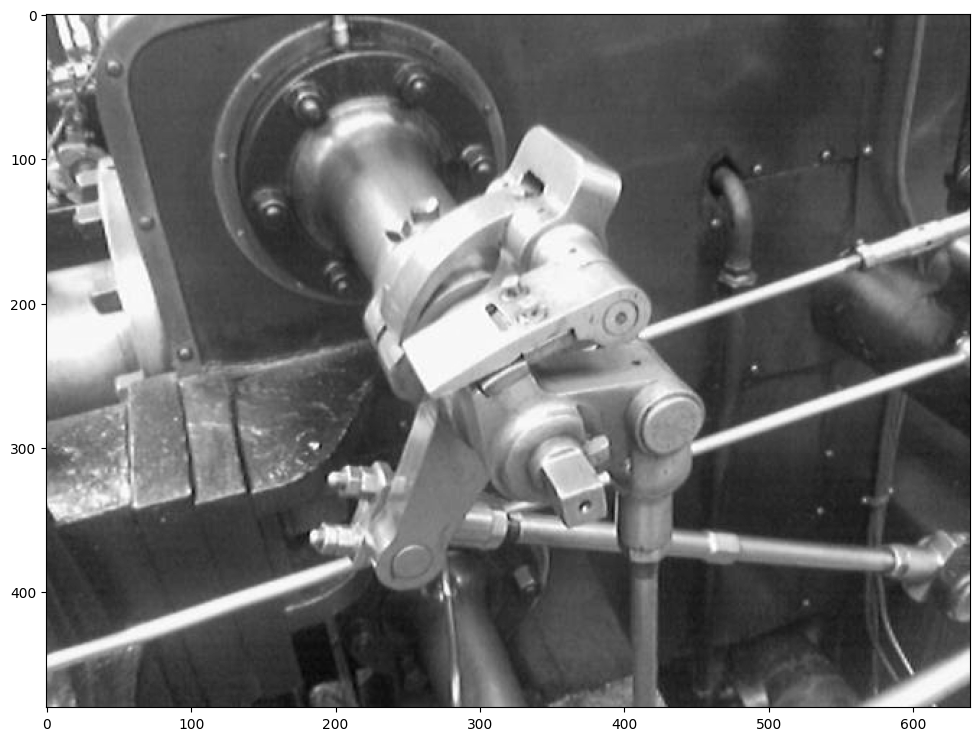

In [27]:
plt.rcParams['figure.figsize'] = (12, 9)

img_path = 'data/valve.png'
img = plt.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

(1 points) Smooth the image with a 5x5 Gaussian kernel with sigma=1 by calling `cv2.GaussianBlur()`. Display the result.

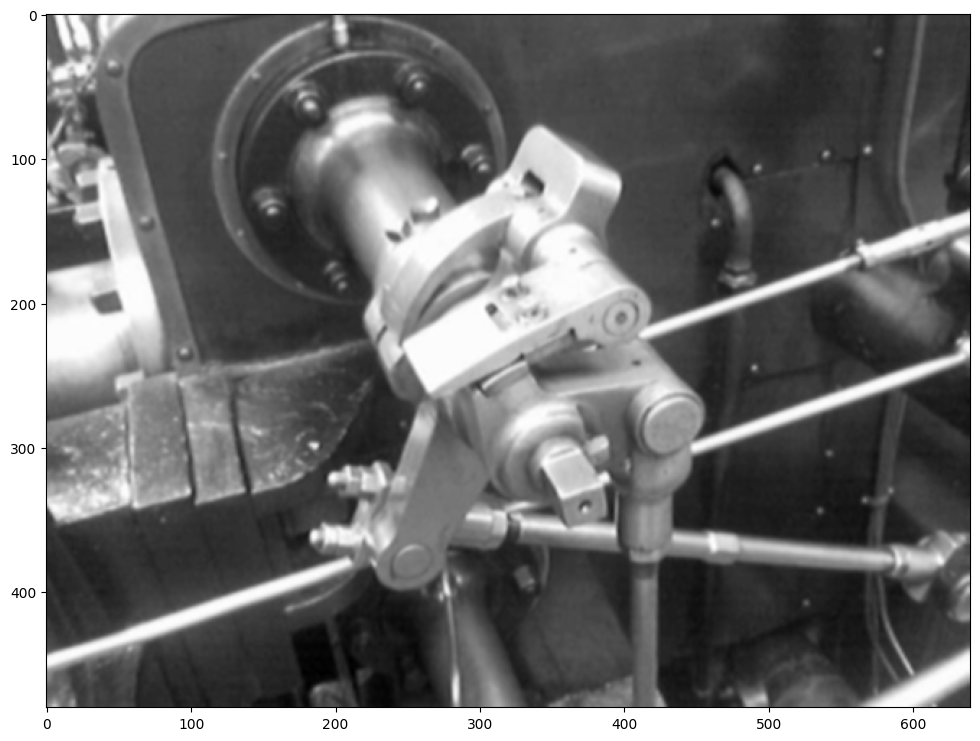

In [28]:
blurred = cv2.GaussianBlur(img, (5, 5), 1)
plt.imshow(blurred, cmap='gray')
plt.show()

(2 points) Calculate the gradient images in both the x direction and the y direction using `cv2.Sobel()` with a kernel size of `3`. Display the results. You should also call `plt.colorbar()` to show the data range of the derivative maps.

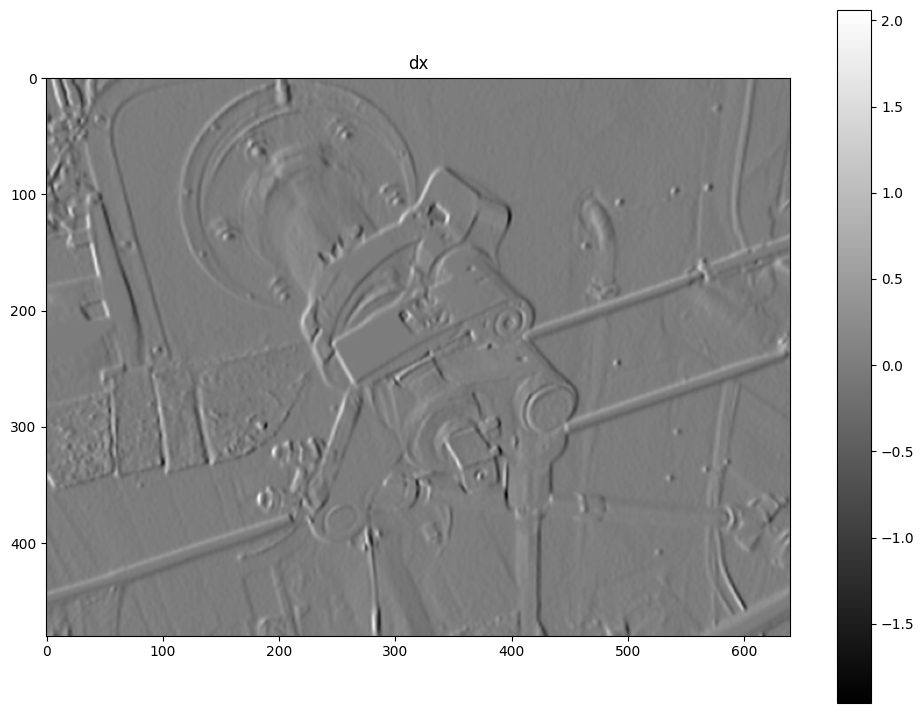

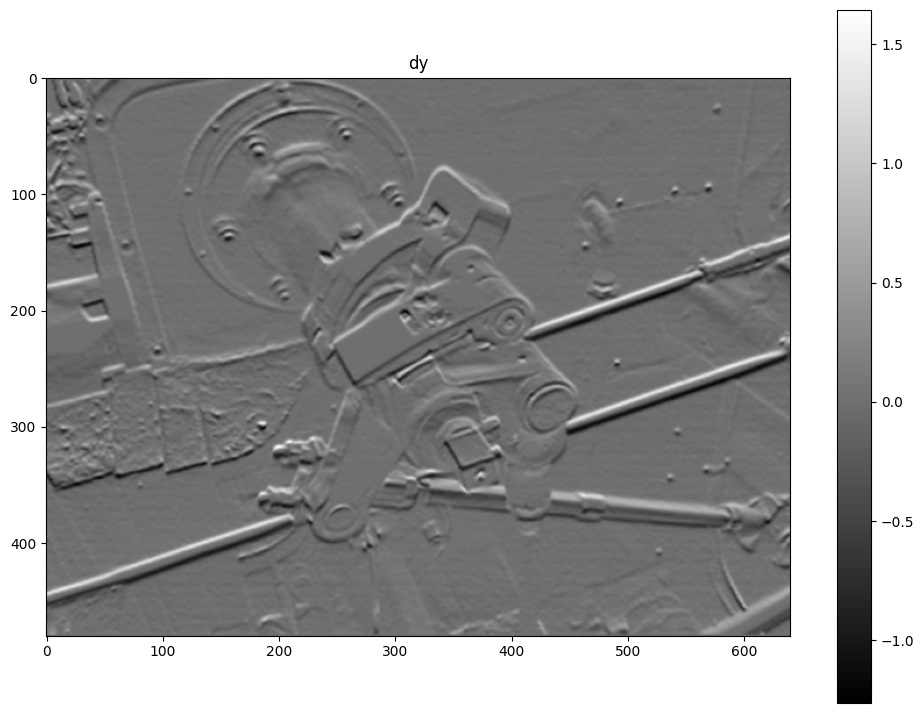

In [29]:
dx = cv2.Sobel(blurred, -1, dx=1, dy=0, ksize=3)
dy = cv2.Sobel(blurred, -1, dx=0, dy=1, ksize=3)
plt.imshow(dx, cmap='gray')
plt.title('dx')
plt.colorbar()
plt.show()

plt.imshow(dy, cmap='gray')
plt.title('dy')
plt.colorbar()
plt.show()

(1 points) Calculate the gradient magnitude map by combining gradients in both directions and display the result.

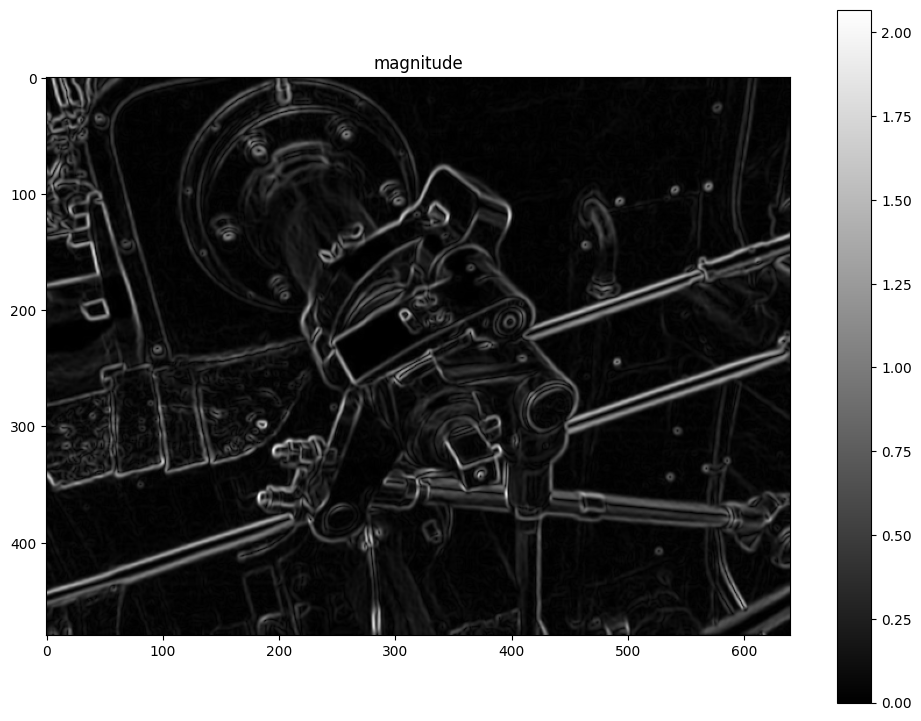

In [30]:
magnitude = np.sqrt(np.square(dx) + np.square(dy))
plt.imshow(magnitude, cmap='gray')
plt.title('magnitude')
plt.colorbar()
plt.show()

(1 points) Pick a threshold on the edge magnitude. Set all pixels with an edge magnitude greater than the threshold to 1.0 and the rest to 0.0. Display the result.

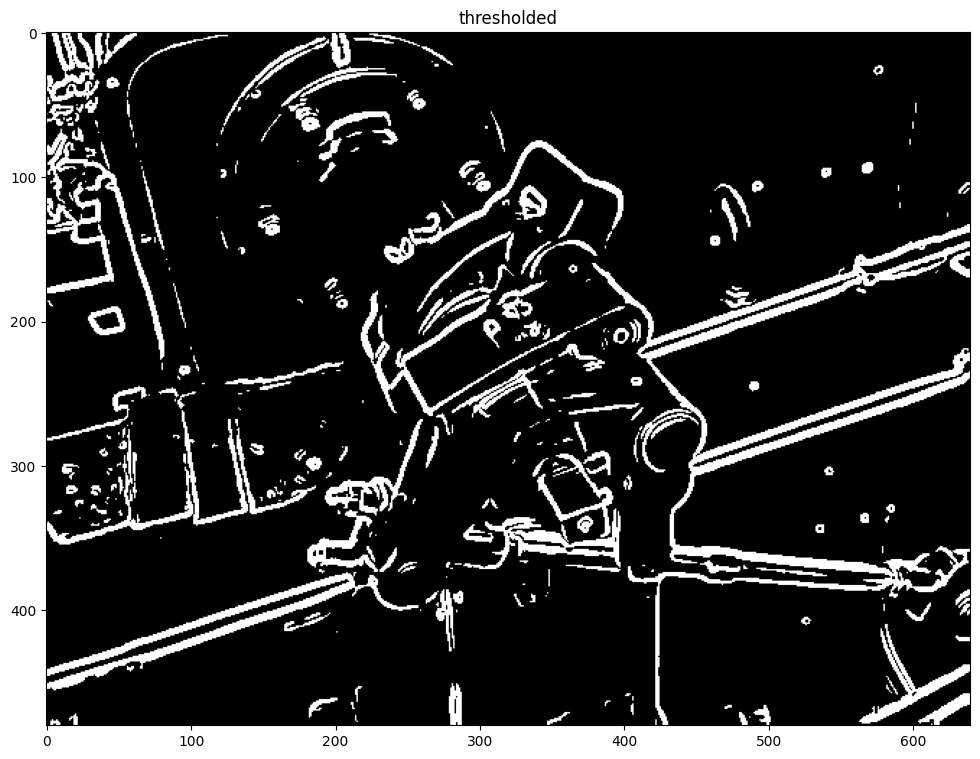

In [31]:
threshold = 0.4
thresholded = np.zeros_like(magnitude)
thresholded[magnitude > threshold] = 1      #threshold = magnitude > threshold

plt.imshow(thresholded, cmap='gray')
plt.title('thresholded')
plt.show()

(1 point) Does this result effectively capture the edges in the image?

In [32]:
# Type your answer below:
# 
# There are some discontinuities
# Some edges are extremely thick
# Other edges are very small


(1 points) Now do edge detection by directly calling `cv2.Canny()` instead. You can refer to OpenCV's [docs](https://docs.opencv.org/4.6.0/) for details. You should pick appropriate thresholds to make the result look reasonabe.


Canny requires img to be in uint8 

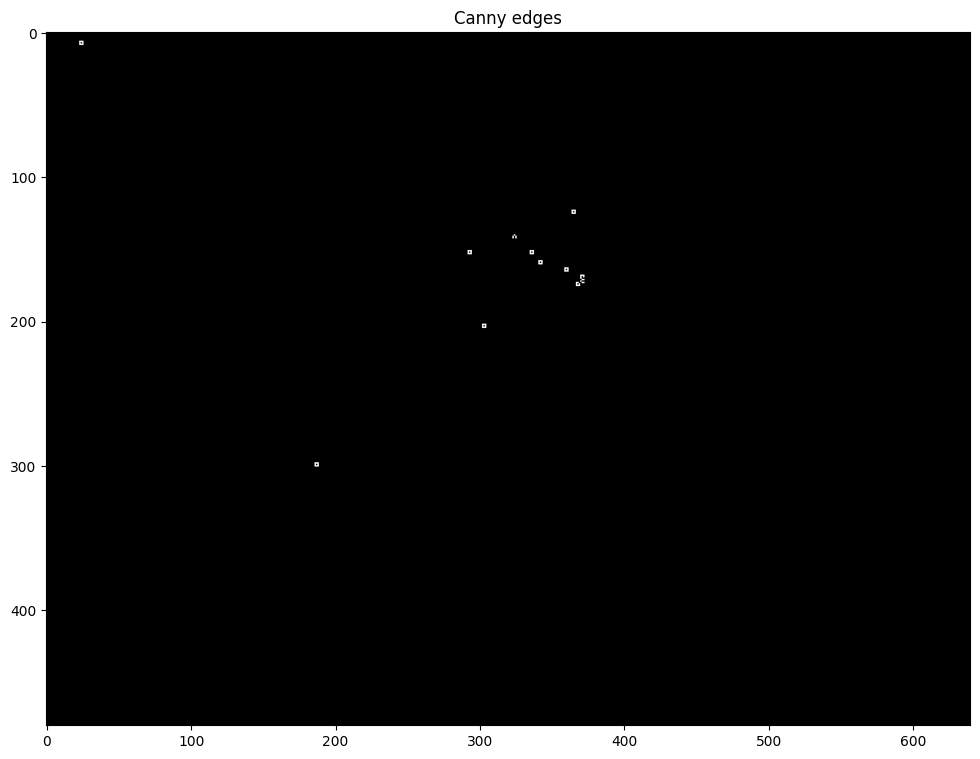

In [33]:
img_uint8 = (img+255).astype(np.uint8)
canny_edges = cv2.Canny(img_uint8, 100, 200)        #100, 200 = low and high thresholds, Hysteresis thresholding


plt.imshow(canny_edges, cmap='gray')
plt.title('Canny edges')
plt.show()

(1 point) Is `cv2.Canny()`'s output better than the results from your previous implementation? What might be causing the differences?

In [34]:
# Type your answer below:
# 